In [32]:
import numpy as np
from assembler import parse_reads_file, DeBruijnGraph
from matplotlib import pyplot as plt

# 4.2

In [7]:
with open('./tests/output/main/contig_lengths') as f:
    contig_lengths = f.readlines()

In [8]:
contig_lengths = [int(c.rstrip()) for c in contig_lengths]

In [10]:
contig_lengths_arr = np.array(contig_lengths)

In [11]:
contig_lengths_arr_cumsum = np.cumsum(contig_lengths)
contig_lengths_arr_cumsum

array([   101,    208,    316,    424,    533,    642,    753,    866,
          980,   1095,   1212,   1330,   1450,   1573,   1699,   1832,
         1966,   2101,   2238,   2375,   2522,   2672,   2824,   2977,
         3130,   3284,   3445,   3607,   3774,   3942,   4111,   4283,
         4463,   4646,   4829,   5013,   5203,   5395,   5589,   5784,
         5980,   6178,   6379,   6581,   6786,   6992,   7206,   7422,
         7640,   7859,   8086,   8314,   8542,   8771,   9011,   9256,
         9502,   9749,   9996,  10245,  10498,  10752,  11007,  11270,
        11550,  11832,  12127,  12423,  12720,  13027,  13337,  13648,
        13961,  14278,  14600,  14929,  15266,  15610,  15960,  16323,
        16690,  17075,  17471,  17867,  18264,  18664,  19070,  19485,
        19901,  20319,  20746,  21184,  21623,  22071,  22522,  22974,
        23429,  23899,  24370,  24845,  25325,  25808,  26291,  26776,
        27269,  27763,  28267,  28776,  29291,  29808,  30332,  30856,
      

In [14]:
N50_mask = (contig_lengths_arr_cumsum / contig_lengths_arr_cumsum[-1]) >= .5

array([1113, 1117, 1121, 1145, 1186, 1191, 1203, 1204, 1207, 1261, 1291,
       1291, 1302, 1342, 1350, 1394, 1412, 1441, 1496, 1500, 1511, 1544,
       1584, 1587, 1610, 1640, 1642, 1678, 1687, 1689, 1718, 1744, 1764,
       1802, 1857, 1984, 2027, 2042, 2072, 2077, 2145, 2184, 2299, 2540,
       2920, 3202, 3610, 5185])

In [17]:
contig_lengths_arr_cumsum[N50_mask]

array([ 84975,  86092,  87213,  88358,  89544,  90735,  91938,  93142,
        94349,  95610,  96901,  98192,  99494, 100836, 102186, 103580,
       104992, 106433, 107929, 109429, 110940, 112484, 114068, 115655,
       117265, 118905, 120547, 122225, 123912, 125601, 127319, 129063,
       130827, 132629, 134486, 136470, 138497, 140539, 142611, 144688,
       146833, 149017, 151316, 153856, 156776, 159978, 163588, 168773])

In [16]:
N50 = contig_lengths_arr[N50_mask][0]
N50

1113

In [19]:
with open('./tests/output/wq/contig_lengths') as f:
    contig_lengths_all = f.readlines()
contig_lengths_all = [int(c.rstrip()) for c in contig_lengths_all]

In [21]:
contig_lengths_all_arr = np.array(contig_lengths_all)
less_than_100 = contig_lengths_all_arr < 100

In [22]:
np.sum(less_than_100)

374

In [23]:
contig_lengths_all_arr[less_than_100]

array([31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40,
       40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49,
       49, 49, 49, 50, 50

# 4.3

In [38]:
with open('./tests/input/main/sequence_reads') as f:
    reads = parse_reads_file(f)

In [39]:
ks = range(10,50,5)
reads_filtered = []
num_branches = []
num_contigs = []
for k in ks:
    graph = DeBruijnGraph(reads, k=k)
    graph.build_graph()
    good_reads = graph.get_good_reads()

    reads_filtered.append(len(reads) - len(good_reads))

    good_graph = DeBruijnGraph(good_reads, k)
    good_graph.build_graph()
    num_branch = 0
    for node in good_graph.nodes.values():
        num_branch += node.is_branch
    
    num_branches.append(num_branch)

    contigs, contig_lengths = good_graph.get_contigs(min_length=100)

    num_contigs.append(len(contigs))


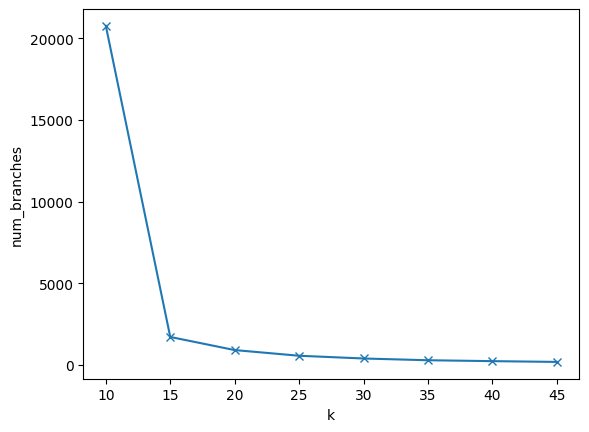

In [43]:
plt.plot(ks, num_branches, marker='x')
plt.xlabel('k')
plt.ylabel('num_branches')
plt.show()

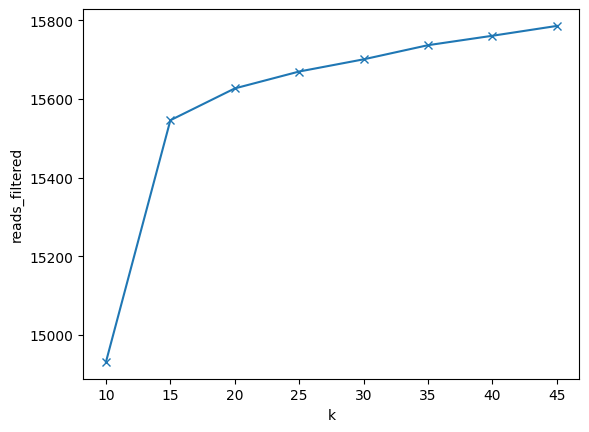

In [45]:
plt.plot(ks, reads_filtered, marker='x')
plt.xlabel('k')
plt.ylabel('reads_filtered')
plt.show()

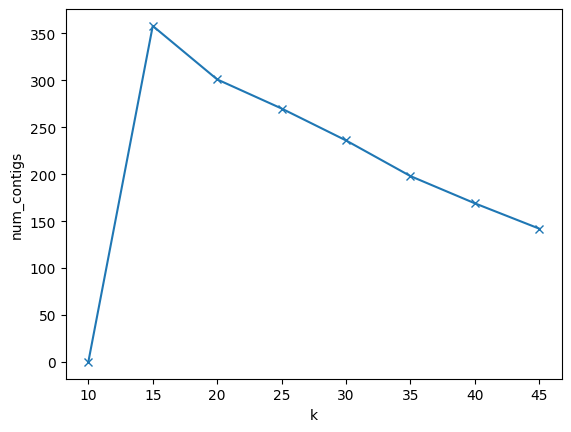

In [46]:
plt.plot(ks, num_contigs, marker='x')
plt.xlabel('k')
plt.ylabel('num_contigs')
plt.show()

In [47]:
num_branches

[20767, 1712, 908, 560, 392, 285, 230, 182]